In [316]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn
from io import StringIO

import wqio
# from wqio.utils import ros

from platform import python_version

In [317]:
# python_version()

In [318]:
helsel_arsenic_data = StringIO("""concentration,qualifier
4.6,=
4.1,=
3.2,=
2.8,=
2.0,<
2.0,<
2.0,<
2.0,<
2.0,<
2.0,<
2.0,<
2.0,<
1.7,=
1.5,=
1.0,<
1.0,<
1.0,<
1.0,<
0.9,=
0.9,<
0.7,=
0.7,=
0.6,=
0.5,=
0.5,=
0.5,=
""")
known_results_helsel = pd.DataFrame([
    3.20, 2.80, 1.42, 1.14, 0.95, 0.81,
    0.68, 0.57, 0.46, 0.35, 1.70, 1.50,
    0.98, 0.76, 0.58, 0.41, 0.90, 0.61,
    0.70, 0.70, 0.60, 0.50, 0.50, 0.50
], columns=['known'])

data = pd.read_csv(helsel_arsenic_data)
data['censored'] = data['qualifier'] == '<'
# data.shape
data.head(24)

,concentration,qualifier,censored
0,4.6,=,False
1,4.1,=,False
2,3.2,=,False
3,2.8,=,False
4,2.0,<,True
5,2.0,<,True
6,2.0,<,True
7,2.0,<,True
8,2.0,<,True
9,2.0,<,True


In [319]:
dfros = wqio.ROS(result=data['concentration'], censorship=data['censored'], as_array=False)

In [320]:
# print(type(dfros))
dfros.head(15)

,res,cen,det_limit_index,rank,plot_pos,Zprelim,estimated,final
0,0.9,True,1,1,0.094017,-1.316417,0.312364,0.312364
1,1.0,True,2,1,0.145055,-1.057881,0.385505,0.385505
2,1.0,True,2,2,0.188034,-0.885164,0.443679,0.443679
3,1.0,True,2,3,0.282051,-0.576759,0.570245,0.570245
4,1.0,True,2,4,0.290110,-0.553064,0.581347,0.581347
5,2.0,True,3,1,0.317308,-0.475241,0.619354,0.619354
6,2.0,True,3,2,0.376068,-0.315823,0.705145,0.705145
7,2.0,True,3,3,0.435165,-0.163240,0.798367,0.798367
8,2.0,True,3,4,0.470085,-0.075055,0.857763,0.857763
9,2.0,True,3,5,0.564103,0.161379,1.039741,1.039741


In [321]:
# arsenic_ros = wqio.ros.MR(data, rescol='concentration', qualcol='qualifier', ndsymbol='<')
# arsenic_ros.data.head(10)

In [322]:
# np.round(known_results_helsel.describe().join(arsenic_ros.data.describe(), how='outer'), 3)

In [323]:
known_results_helsel.describe()

,known
count,24.000000
mean,0.971667
std,0.718432
min,0.350000
25%,0.552500
50%,0.700000
75%,1.020000
max,3.200000


In [324]:
dfros.describe()

,res,det_limit_index,rank,plot_pos,Zprelim,estimated,final
count,26.000000,26.000000,26.000000,26.000000,26.000000,13.000000,26.000000
mean,1.661538,1.923077,3.153846,0.500000,0.029775,0.788151,1.251768
std,1.079288,1.230385,2.033565,0.275238,0.869598,0.371284,1.150297
min,0.500000,0.000000,1.000000,0.090659,-1.336706,0.312364,0.312364
25%,0.900000,1.000000,1.250000,0.284066,-0.570835,0.570245,0.573021
50%,1.600000,2.000000,3.000000,0.461691,-0.096196,0.705145,0.751756
75%,2.000000,3.000000,4.000000,0.734089,0.627808,1.039741,1.442533
max,4.600000,3.000000,8.000000,0.969231,1.869607,1.587245,4.600000


In [325]:
known_results_helsel.join(dfros, how='outer')

,known,res,cen,det_limit_index,rank,plot_pos,Zprelim,estimated,final
0,3.20,0.9,True,1,1,0.094017,-1.316417,0.312364,0.312364
1,2.80,1.0,True,2,1,0.145055,-1.057881,0.385505,0.385505
2,1.42,1.0,True,2,2,0.188034,-0.885164,0.443679,0.443679
3,1.14,1.0,True,2,3,0.282051,-0.576759,0.570245,0.570245
4,0.95,1.0,True,2,4,0.290110,-0.553064,0.581347,0.581347
5,0.81,2.0,True,3,1,0.317308,-0.475241,0.619354,0.619354
6,0.68,2.0,True,3,2,0.376068,-0.315823,0.705145,0.705145
7,0.57,2.0,True,3,3,0.435165,-0.163240,0.798367,0.798367
8,0.46,2.0,True,3,4,0.470085,-0.075055,0.857763,0.857763
9,0.35,2.0,True,3,5,0.564103,0.161379,1.039741,1.039741


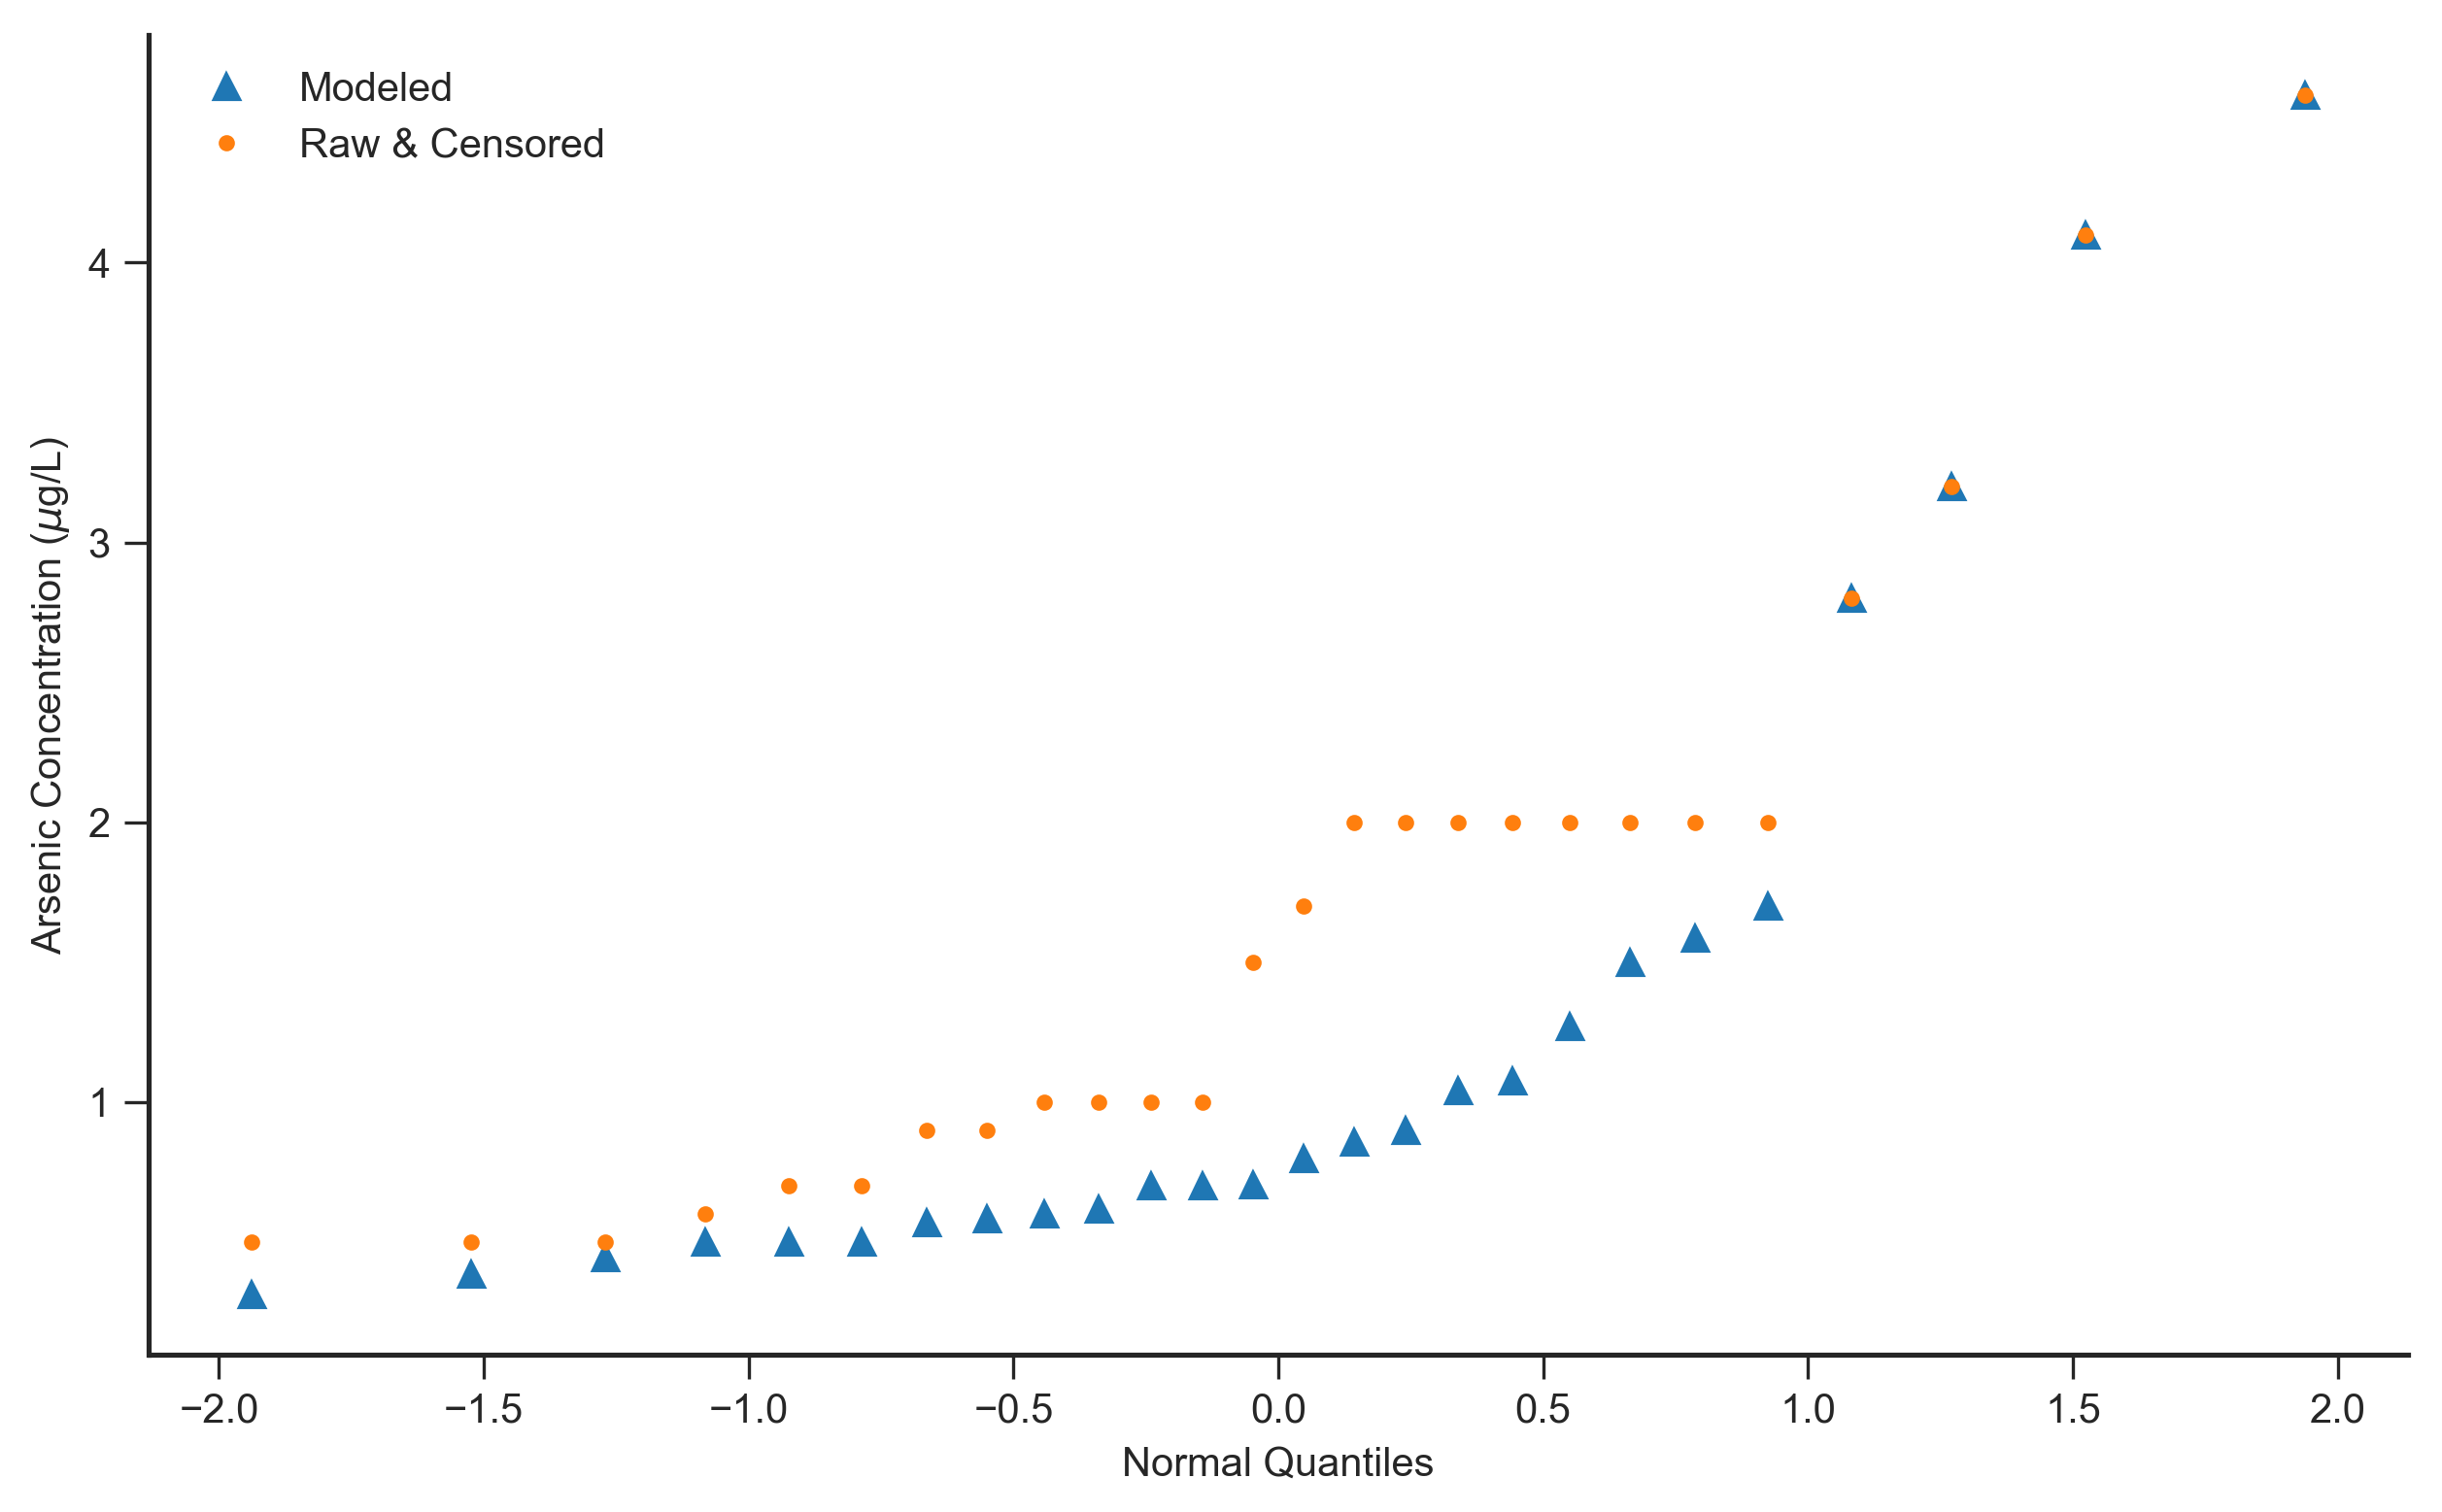

In [326]:
seaborn.set_style('ticks')
plt.rcParams['text.usetex'] = False

def qqplot(data, col, ax=None):
    if ax is None:
        ax = plt.gca()
    
    osr, osm = stats.probplot(data[col], fit=False)
    if col == 'final':
        ax.plot(osr, osm, '^', label='Modeled')
    elif (col == 'res') | (col == 'Result'):
        ax.plot(osr, osm, '.', label='Raw & Censored')
    
fig, ax = plt.subplots(figsize=(10,6), dpi=300)
qqplot(dfros, 'final', ax=ax)
qqplot(dfros, 'res', ax=ax)
ax.set_xlabel('Normal Quantiles')
ax.set_ylabel(u'Arsenic Concentration ($\mu$g/L)')
ax.legend(loc='upper left')
seaborn.despine(ax=ax)

In [327]:
# Now using our data.

In [328]:
# Read data csv file.
df = pd.read_csv("Drinking_Water.csv")

df.shape

(38750, 19)

In [335]:
# Count number of non-detects (ND) in "Result" column.
# df['Result'].isna().sum()
# df['Result'].value_counts()
df['Result'].str.contains('ND').value_counts()[True]

24991

In [336]:
# Create a column indicating whether the result is censored or not.
df['Censored'] = df['Result'] == 'ND'
df.head(100)

,PWS ID,PWS Name,Town,Class,Contaminant Group,Chemical Name,Collected Date,Result,UOM,Result Qualifier,Result Description,Reporting Limit,Location ID,Location Name,Raw or Finished,Method,Maximum Contaminant Level (MCL),Lab Reported Detection Limit,Required Detection Limit,Censored
0,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,06/26/2018,4.6,NG/L,NaN,NaN,2 NG/L,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,Not Recorded,2.0,False
1,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,05/23/2017,6.5,NG/L,NaN,NaN,2 NG/L,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,Not Recorded,2.0,False
2,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,05/23/2017,28,NG/L,NaN,NaN,2 NG/L,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,Not Recorded,2.0,False
3,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROBUTANESULFONIC ACID-PFBS,06/26/2018,3.6,NG/L,NaN,NaN,2 NG/L,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,Not Recorded,70.0,False
4,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEXANESULFONIC ACID-PFHXS,06/26/2018,2,NG/L,NaN,NaN,2 NG/L,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,Not Recorded,2.0,False
5,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANOIC ACID-PFOA,05/23/2017,76,NG/L,NaN,NaN,2 NG/L,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,Not Recorded,2.0,False
6,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,06/26/2018,4.5,NG/L,NaN,NaN,2 NG/L,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,Not Recorded,2.0,False
7,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUORONONANOIC ACID-PFNA,05/23/2017,ND,NG/L,NaN,NaN,2 NG/L,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,Not Recorded,2.0,True
8,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,03/21/2018,3.7,NG/L,NaN,NaN,2 NG/L,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,Not Recorded,2.0,False
9,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,03/21/2018,3.8,NG/L,NaN,NaN,2 NG/L,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,Not Recorded,2.0,False


In [337]:
# Need to convert certain columns to float.
# Converting the "Result" column is simple since it typically only contains numbers or "ND."
# df['Result'] = pd.to_numeric(df['Result'], errors='coerce')

# "Lab Reported Detection Limit" and "Reporting Limit" columns contain the UOM (ng/L).
# Converting columns directly to float will result in NaNs.
# The UOM must be removed before numeric conversion.
df['Lab Reported Detection Limit'] = df['Lab Reported Detection Limit'].replace(to_replace=r'NG/L$', value='', regex=True)
df['Lab Reported Detection Limit'] = pd.to_numeric(df['Lab Reported Detection Limit'], errors='coerce')
df['Reporting Limit'] = df['Reporting Limit'].replace(to_replace=r'NG/L$', value='', regex=True)
df['Reporting Limit'] = pd.to_numeric(df['Reporting Limit'], errors='coerce')

# Replace "ND's" in 'Result' with corresponding 'Lab Reported Detection Limit'.
cond = df['Censored'] == True
df.loc[cond, 'Result'] = df.loc[cond, 'Lab Reported Detection Limit']

df.head()

,PWS ID,PWS Name,Town,Class,Contaminant Group,Chemical Name,Collected Date,Result,UOM,Result Qualifier,Result Description,Reporting Limit,Location ID,Location Name,Raw or Finished,Method,Maximum Contaminant Level (MCL),Lab Reported Detection Limit,Required Detection Limit,Censored
0,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,06/26/2018,4.6,NG/L,NaN,NaN,2.0,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,2.0,False
1,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,05/23/2017,6.5,NG/L,NaN,NaN,2.0,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,False
2,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,05/23/2017,28,NG/L,NaN,NaN,2.0,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,False
3,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROBUTANESULFONIC ACID-PFBS,06/26/2018,3.6,NG/L,NaN,NaN,2.0,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,70.0,False
4,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEXANESULFONIC ACID-PFHXS,06/26/2018,2,NG/L,NaN,NaN,2.0,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,2.0,False


In [338]:
# df['Result'].isna().sum()

# Convert Result column to float.
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')

# Check to see if there are remaining NaNs. This happens because sometimes the lab reports do not
# have the "Lab Reported Detection Limit" field filled out.
df['Result'].isna().sum()

# print(df.dtypes)

9421

In [339]:
# Convert remaining NaNs to equal corresponding Reporting Limit.
cond = df['Result'].isna()
df.loc[cond, 'Result'] = df.loc[cond, 'Reporting Limit']

df.head(100)

,PWS ID,PWS Name,Town,Class,Contaminant Group,Chemical Name,Collected Date,Result,UOM,Result Qualifier,Result Description,Reporting Limit,Location ID,Location Name,Raw or Finished,Method,Maximum Contaminant Level (MCL),Lab Reported Detection Limit,Required Detection Limit,Censored
0,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,06/26/2018,4.600,NG/L,NaN,NaN,2.00,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,2.0,False
1,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,05/23/2017,6.500,NG/L,NaN,NaN,2.00,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,False
2,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,05/23/2017,28.000,NG/L,NaN,NaN,2.00,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,False
3,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROBUTANESULFONIC ACID-PFBS,06/26/2018,3.600,NG/L,NaN,NaN,2.00,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,70.0,False
4,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEXANESULFONIC ACID-PFHXS,06/26/2018,2.000,NG/L,NaN,NaN,2.00,RW-06G,RAW: CHESTNUT ST. WELL #3,R,EPA 537,NaN,NaN,2.0,False
5,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANOIC ACID-PFOA,05/23/2017,76.000,NG/L,NaN,NaN,2.00,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,False
6,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,06/26/2018,4.500,NG/L,NaN,NaN,2.00,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,NaN,2.0,False
7,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUORONONANOIC ACID-PFNA,05/23/2017,2.000,NG/L,NaN,NaN,2.00,RW-05G,RAW: CHESTNUT ST. WELL #2,R,EPA 537,NaN,NaN,2.0,True
8,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROHEPTANOIC ACID-PFHPA,03/21/2018,3.700,NG/L,NaN,NaN,2.00,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,NaN,2.0,False
9,2141000,HUDSON WATER SUPPLY,HUDSON,COM,PFAS,PERFLUOROOCTANESULFONIC ACID-PFOS,03/21/2018,3.800,NG/L,NaN,NaN,2.00,MULT3,FINISHED: CHESTNUT ST. WTF,F,EPA 537,NaN,NaN,2.0,False


In [340]:
# df.head(25)
# print(df)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 20 columns):
PWS ID                             38750 non-null int64
PWS Name                           38750 non-null object
Town                               38736 non-null object
Class                              38750 non-null object
Contaminant Group                  38750 non-null object
Chemical Name                      38750 non-null object
Collected Date                     38750 non-null object
Result                             38705 non-null float64
UOM                                38750 non-null object
Result Qualifier                   6213 non-null object
Result Description                 5060 non-null object
Reporting Limit                    38639 non-null float64
Location ID                        38750 non-null object
Location Name                      38750 non-null object
Raw or Finished                    38750 non-null object
Method                             38

In [342]:
# Get group statistics.
groups = df.groupby(by=['Chemical Name'])
df.groupby('Chemical Name')['Result'].mean()

Chemical Name
11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC ACID-11CL-PF3OUDS     1.209126
4,8-DIOXA-3H-PERFLUORONONANOIC ACID - ADONA                          1.181139
9-CHLOROHEXADECAFLUORO-3-OXANONE-1-SULFONIC ACID-9CL-PF3ONS          1.271973
HEXAFLUOROPROPYLENE OXIDE DIMER ACID - HFPO-DA                       2.299292
N-ETHYL PERFLUOROOCTANESULFONAMIDOACETIC ACID - NETFOSAA             1.674216
N-METHYL PERFLUOROOCTANESULFONAMIDOACETIC ACID - NMEFOSAA            1.652991
PERFLUOROBUTANESULFONIC ACID-PFBS                                    2.885801
PERFLUORODECANOIC ACID - PFDA                                        0.903698
PERFLUORODODECANOIC ACID - PFDOA                                     1.277213
PERFLUOROHEPTANOIC ACID-PFHPA                                        2.809688
PERFLUOROHEXANESULFONIC ACID-PFHXS                                   3.584036
PERFLUOROHEXANOIC ACID - PFHXA                                       4.602624
PERFLUORONONANOIC ACID-PFNA                       

In [343]:
groups_sorted = df.sort_values(['Chemical Name'], ascending=True)
groups_sorted.head(100)

,PWS ID,PWS Name,Town,Class,Contaminant Group,Chemical Name,Collected Date,Result,UOM,Result Qualifier,Result Description,Reporting Limit,Location ID,Location Name,Raw or Finished,Method,Maximum Contaminant Level (MCL),Lab Reported Detection Limit,Required Detection Limit,Censored
32700,2125021,AYER ROAD PROPERTIES LLC,HARVARD,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,01/12/2021,0.522,NG/L,NaN,NaN,1.86,MP-BCF,BETWEEN CARBON FILTERS,R,EPA 537.1,NaN,0.522,20.0,True
34070,4266000,SHARON WATER DEPT,SHARON,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,05/04/2021,0.500,NG/L,U,NON-DETECT,2.00,10387,GP WELL # 7,F,EPA 537.1,NaN,0.500,20.0,True
34066,2287000,STURBRIDGE WATER DEPARTMENT,STURBRIDGE,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,11/20/2020,0.192,NG/L,NaN,NaN,1.83,RW-05G,RAW WATER: WELL #5,R,EPA 537.1,NaN,0.192,20.0,True
29359,2304006,QUAKER MOTOR LODGE,UXBRIDGE,NC,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,03/29/2021,0.185,NG/L,NaN,NaN,1.77,01G,WELL #1,F,EPA 537.1,NaN,0.185,20.0,True
19477,2299000,TOWNSEND WATER DEPARTMENT,TOWNSEND,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,03/10/2021,0.500,NG/L,NaN,NaN,2.00,RW-04G,WITCHES BROOK WELL #1 - RAW,R,EPA 537.1,NaN,0.500,20.0,True
8228,2101000,FRANKLIN WATER DEPARTMENT,FRANKLIN,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,03/15/2021,0.500,NG/L,NaN,NaN,2.00,MULT 1,HAYWARD STREET WTF (FINISHED BLEND),F,EPA 537.1,NaN,0.500,20.0,True
2921,2019000,AYER DPW WATER DIVISION,AYER,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,11/22/2019,0.190,NG/L,NaN,NaN,0.19,RW-06G,RAW WATER: GROVE POND WELL 6,R,EPA 537.1,NaN,NaN,20.0,True
19484,2115000,GROTON WATER DEPARTMENT,GROTON,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,10/28/2019,1.890,NG/L,NaN,NaN,1.89,02G,BADDACOOK POND WELL (TREATED),F,EPA 537.1,NaN,NaN,20.0,True
19490,2019000,AYER DPW WATER DIVISION,AYER,COM,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,04/28/2021,0.648,NG/L,NaN,NaN,1.94,MULT 7,FINISHED: GROVE POND WTF (BLEND),F,EPA 537.1,NaN,0.648,20.0,True
14125,2290016,BLACKSTONE NATIONAL GOLF CLUB,SUTTON,NC,PFAS,11-CHLOROEICOSAFLUORO-3-OXAUNDECANE-1-SULFONIC...,04/19/2021,0.197,NG/L,NaN,NaN,1.87,RW-01G,RAW WATER: WELL #1 PUMPHOUSE,R,EPA 537.1,NaN,0.197,20.0,True


In [344]:
# Filter for a Chemical Name.
dfComp01 = df[df['Chemical Name'].str.contains('PF3OUDS')]

# Compute number of censored data for the selected chemical name.
# dfComp01.Censored[dfComp01['Censored'] == False].sum()
(len(dfComp01['Censored'])) - (dfComp01['Censored'].sum())

1

In [345]:
# Run ROS

dfComp01_ros = wqio.ROS(result=dfComp01['Result'], censorship=dfComp01['Censored'], as_array=False)

if dfComp01_ros['final'].isna().sum():
    resLabel = 'Result'
    cond = dfComp01_ros['final'].isna()
    dfComp01_ros.loc[cond, 'final'] = dfComp01_ros.loc[cond, 'Result'] / 2.0
else:
    resLabel = 'res'


In [346]:
dfComp01_ros.head()

,res,cen,final
155,0.500,True,0.2500
156,0.194,True,0.0970
183,2.000,True,1.0000
206,0.197,True,0.0985
234,0.500,True,0.2500


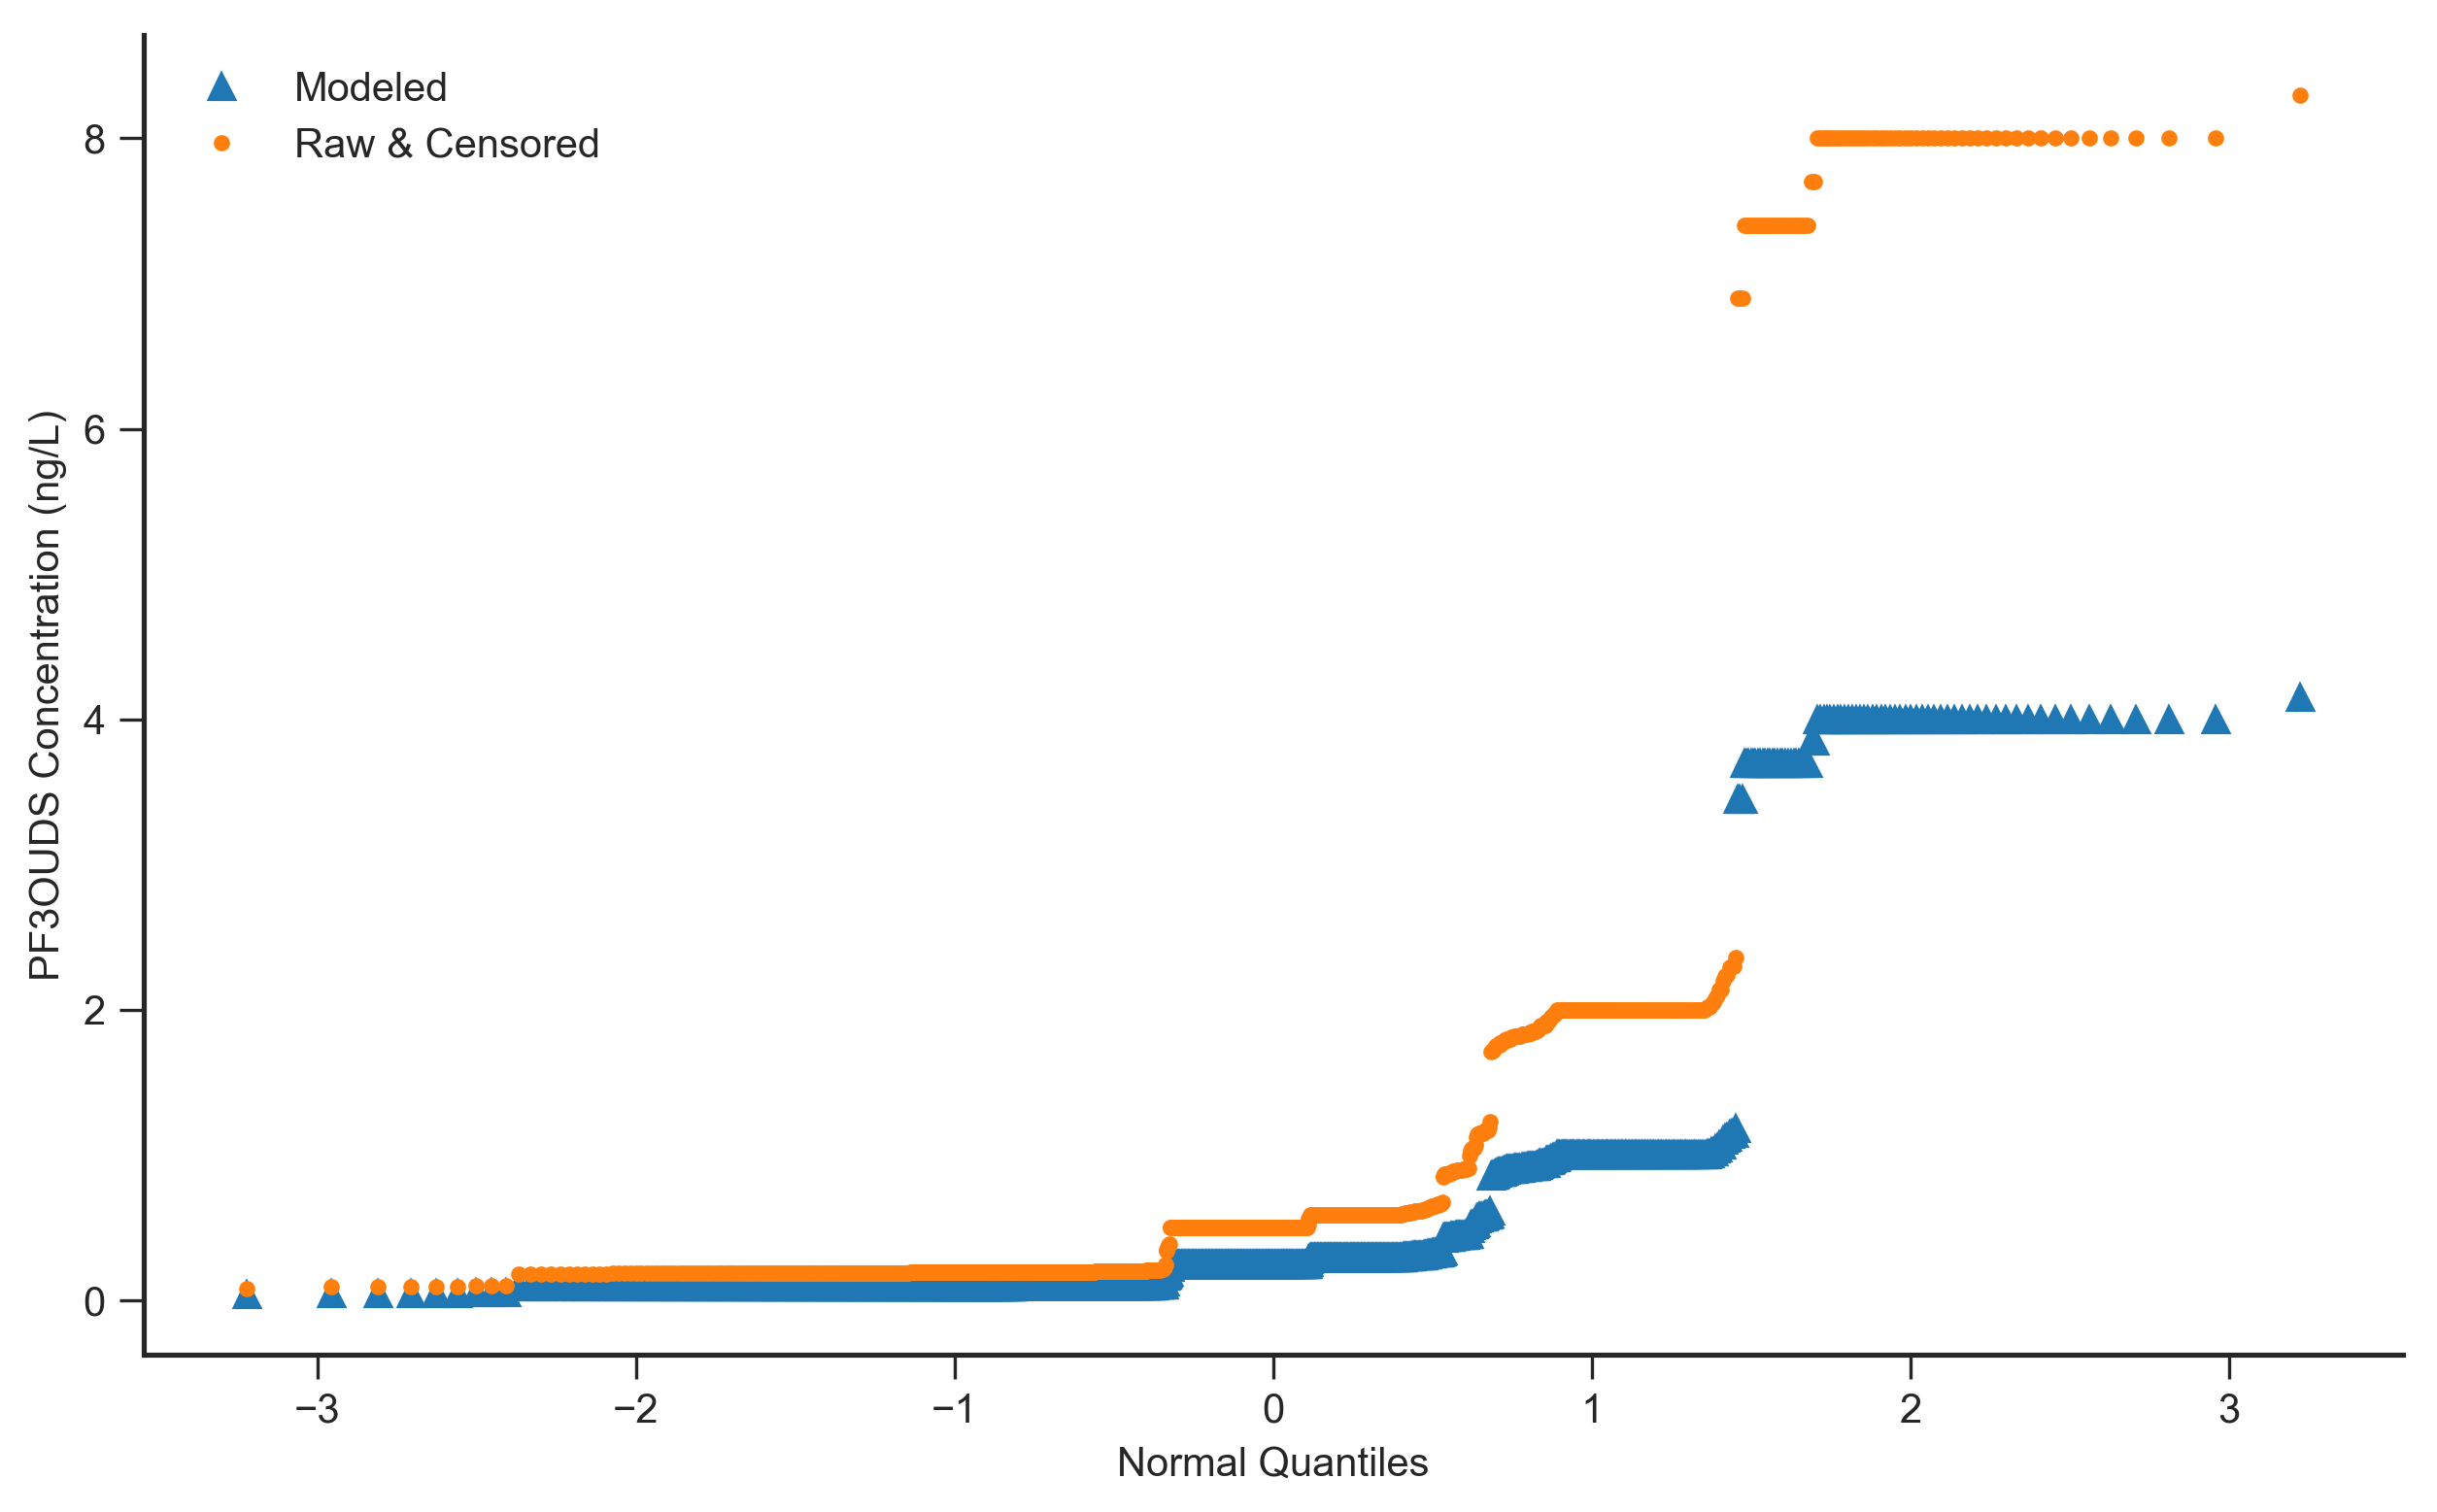

In [347]:
fig, ax = plt.subplots(figsize=(10,6), dpi=300)
qqplot(dfComp01_ros, 'final', ax=ax)
qqplot(dfComp01_ros, resLabel, ax=ax)
ax.set_xlabel('Normal Quantiles')
ax.set_ylabel(u'PF3OUDS Concentration (ng/L)')
ax.legend(loc='upper left')
seaborn.despine(ax=ax)

In [348]:
# Filter for the next Chemical Name.

chemName = 'PFOA'
dfComp02 = df[df['Chemical Name'].str.contains(chemName)]
# dfComp02[dfComp02['Censored'] == True].sum()
# (len(dfComp02['Censored'])) - (dfComp02['Censored'].sum())
print(len(dfComp02['Censored']))
print(dfComp02['Censored'].sum())

dfComp02_ros = wqio.ROS(result='Result', censorship='Censored', df=dfComp02, as_array=False)
# print(dfComp02_ros)
# Issue with low numbers.

if dfComp02_ros['final'].isna().sum():
    resLabel = 'Result'
    cond = dfComp02_ros['final'].isna()
    dfComp02_ros.loc[cond, 'final'] = dfComp02_ros.loc[cond, 'Result'] / 2.0
else:
    resLabel = 'res'

dfComp02_ros.head()

# print(dfComp02_ros)

3384
946


/anaconda3/envs/py35/lib/python3.5/site-packages/wqio/ros.py:157: RuntimeWarning: invalid value encountered in double_scalars
  PE[j] = PE[j + 1] + (1 - PE[j + 1]) * A[j] / (A[j] + B[j])
/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


,Result,Censored,det_limit_index,rank,plot_pos,Zprelim,estimated,final
0,0.002,True,0,1,NaN,NaN,NaN,0.001
1,0.002,True,0,2,NaN,NaN,NaN,0.001
2,0.002,True,0,3,NaN,NaN,NaN,0.001
3,0.002,True,0,4,NaN,NaN,NaN,0.001
4,0.002,True,0,5,NaN,NaN,NaN,0.001


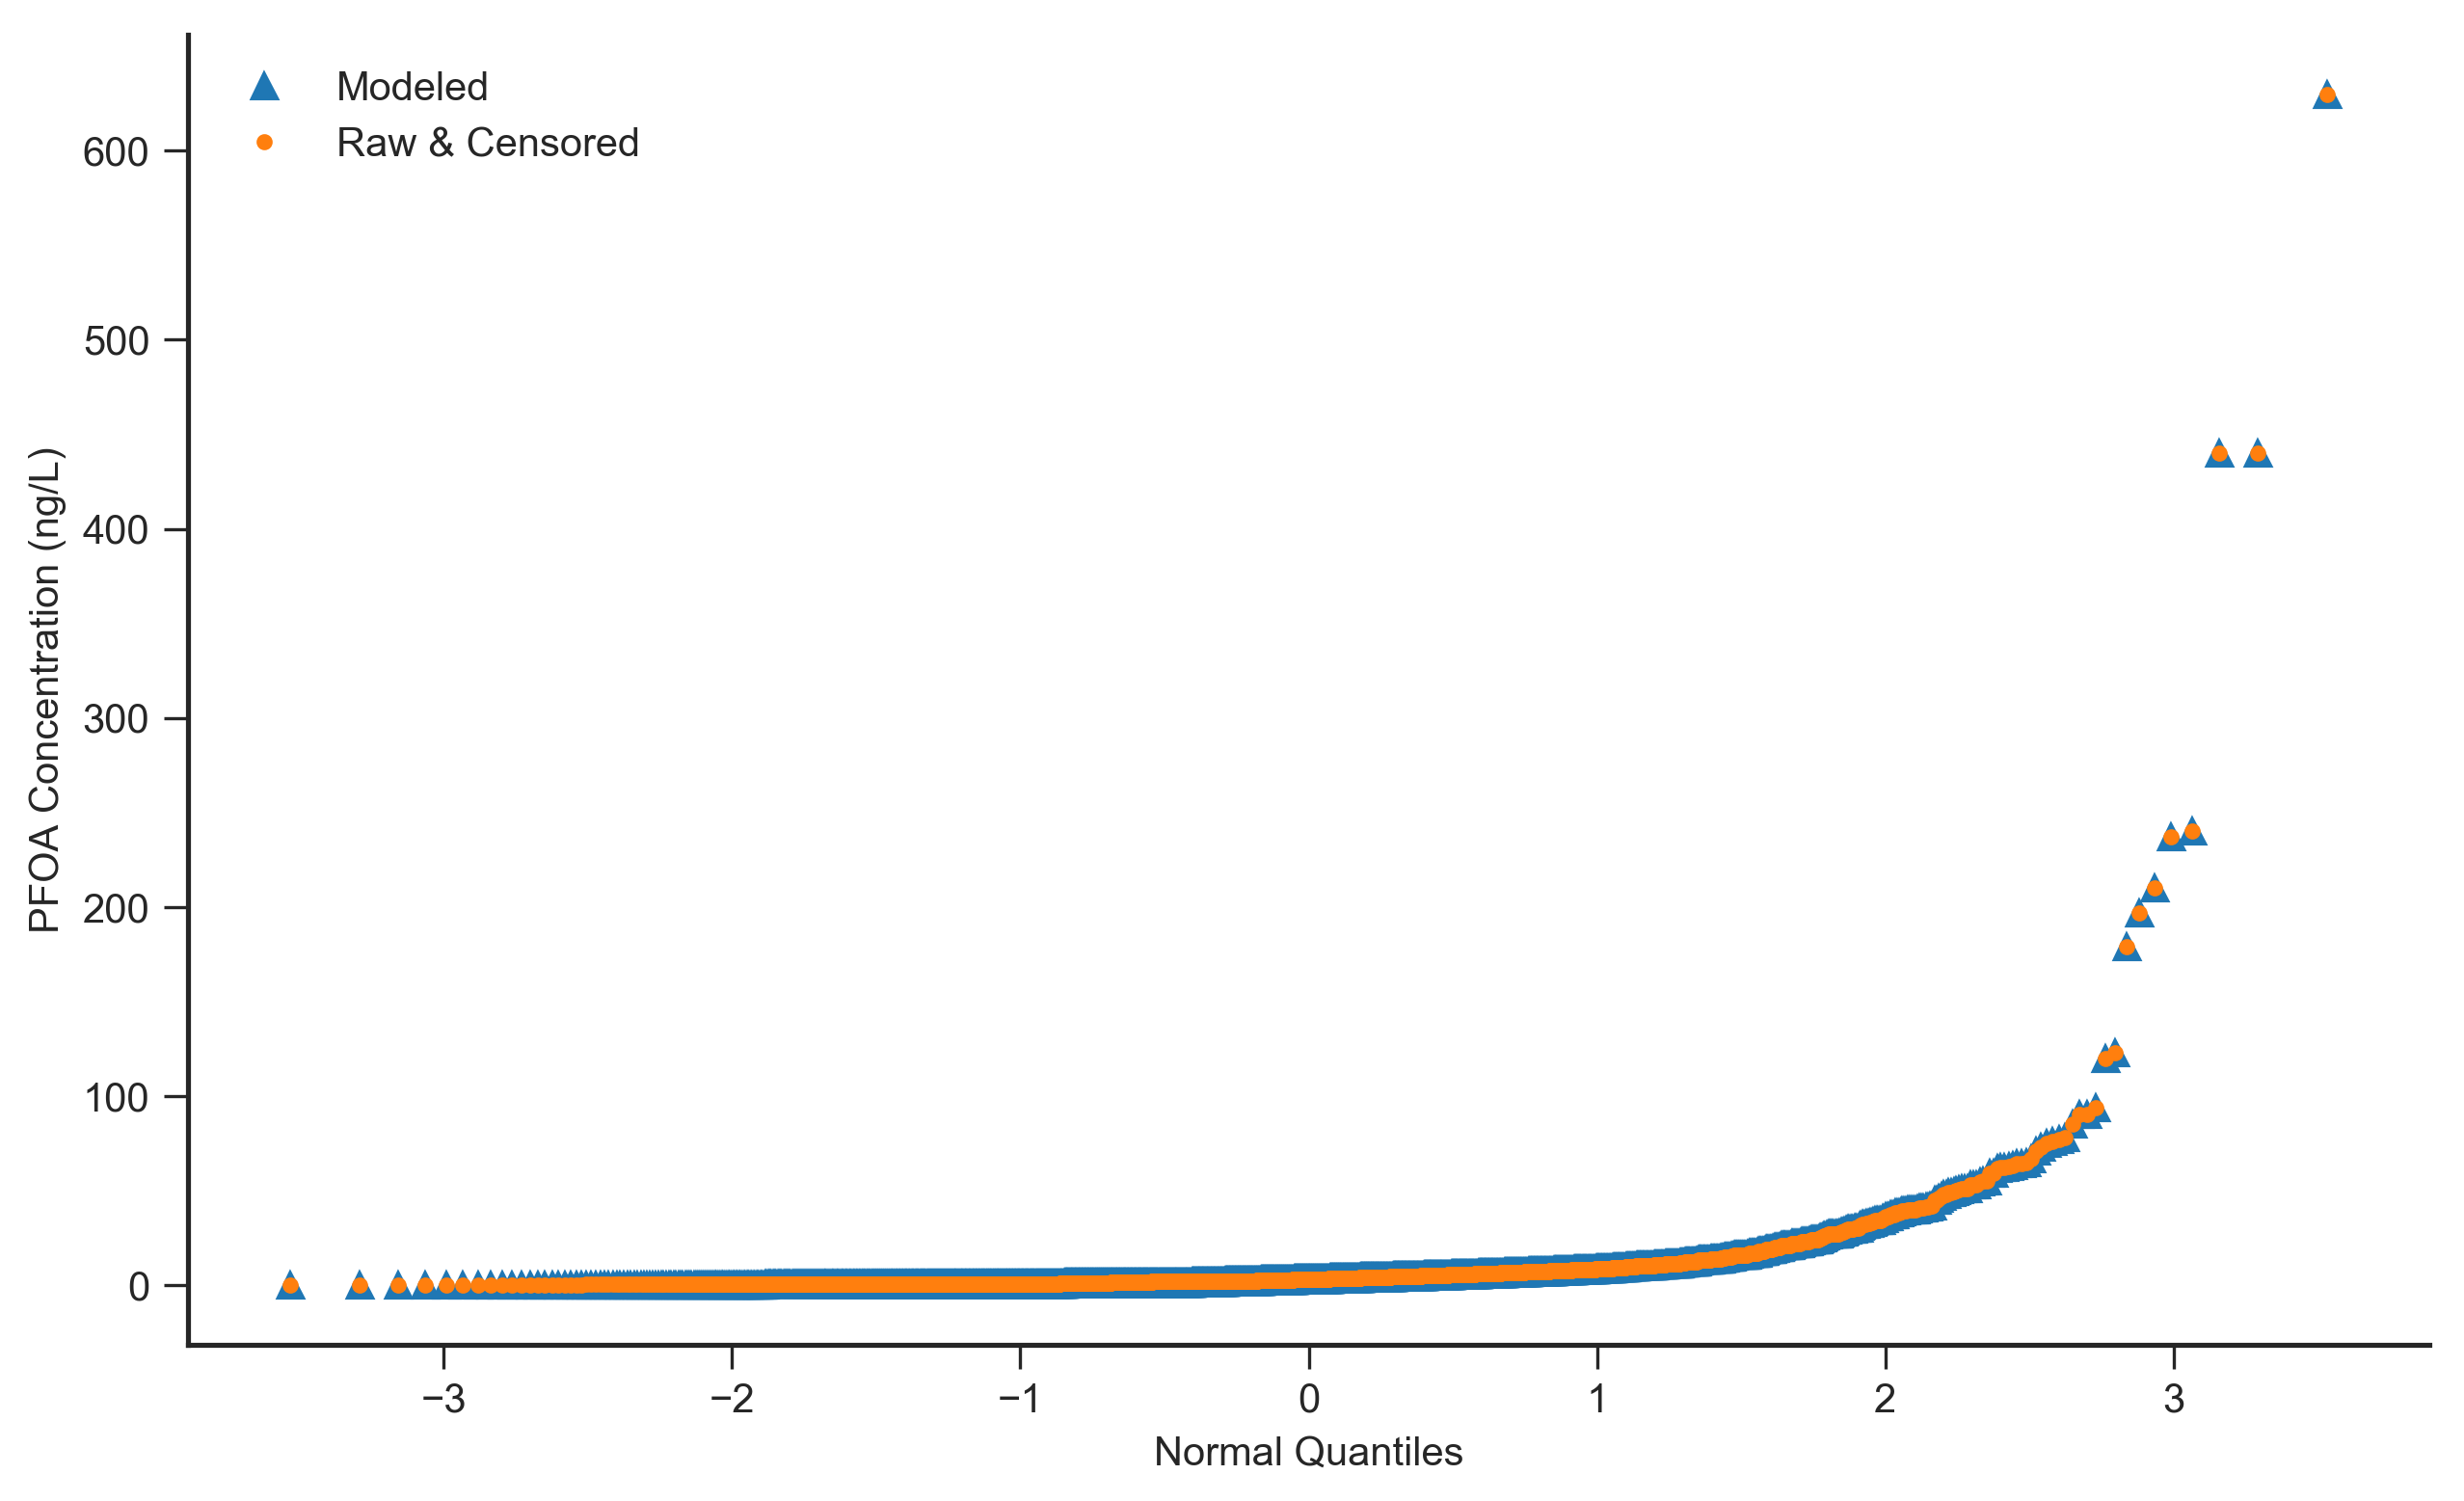

In [349]:
fig, ax = plt.subplots(figsize=(10,6), dpi=300)
qqplot(dfComp02_ros, 'final', ax=ax)
qqplot(dfComp02_ros, resLabel, ax=ax)
ax.set_xlabel('Normal Quantiles')
ax.set_ylabel(chemName + ' Concentration (ng/L)')
ax.legend(loc='upper left')
seaborn.despine(ax=ax)